# Analysis of Ar41 export by 2M Neutrons
In this notebook, we see the exportation of Ar41 events selected by the 2M neutrons simulation.

Please note that we convert the energies **in KeV** to be consistent with the previous studies.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 32})

In [2]:
def load_dataframe_from_files(dirin, fileprefix, max_files=100):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info]  Loading {} files from {}\n\twt prefix: {}".format(len(files), dirin, fileprefix))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:max_files]:
        print(".", end='')
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print("")
    return df

In [3]:
# load sliced detections file
df_wholevolume = load_dataframe_from_files("Sampling_WholeVolume_2M/Neutrons_Sliced", "SlicedDetections*csv")
df_roivolume = load_dataframe_from_files("Sampling_ROIVolume_2M/Neutrons_Sliced", "SlicedDetections*csv")

print("[Info] Old Run: 2M Neutrons sampled from whole LAr volume: {} Events wt Ar41".format(df_wholevolume.eventnumber.nunique()))
print("[Info] New Run: 2M Neutrons sampled from ROI volume: {} Events wt Ar41".format(df_roivolume.eventnumber.nunique()))

[Info]  Loading 1 files from Sampling_WholeVolume_2M/Neutrons_Sliced
	wt prefix: SlicedDetections*csv

[Info]  Loading 1 files from Sampling_ROIVolume_2M/Neutrons_Sliced
	wt prefix: SlicedDetections*csv

[Info] Old Run: 2M Neutrons sampled from whole LAr volume: 23554 Events wt Ar41
[Info] New Run: 2M Neutrons sampled from ROI volume: 38549 Events wt Ar41


# Energy Deposition

In [4]:
edep_gby_event_wholevolume = df_wholevolume.groupby("eventnumber").energydeposition.sum()
edep_gby_event_roivolume = df_roivolume.groupby("eventnumber").energydeposition.sum()

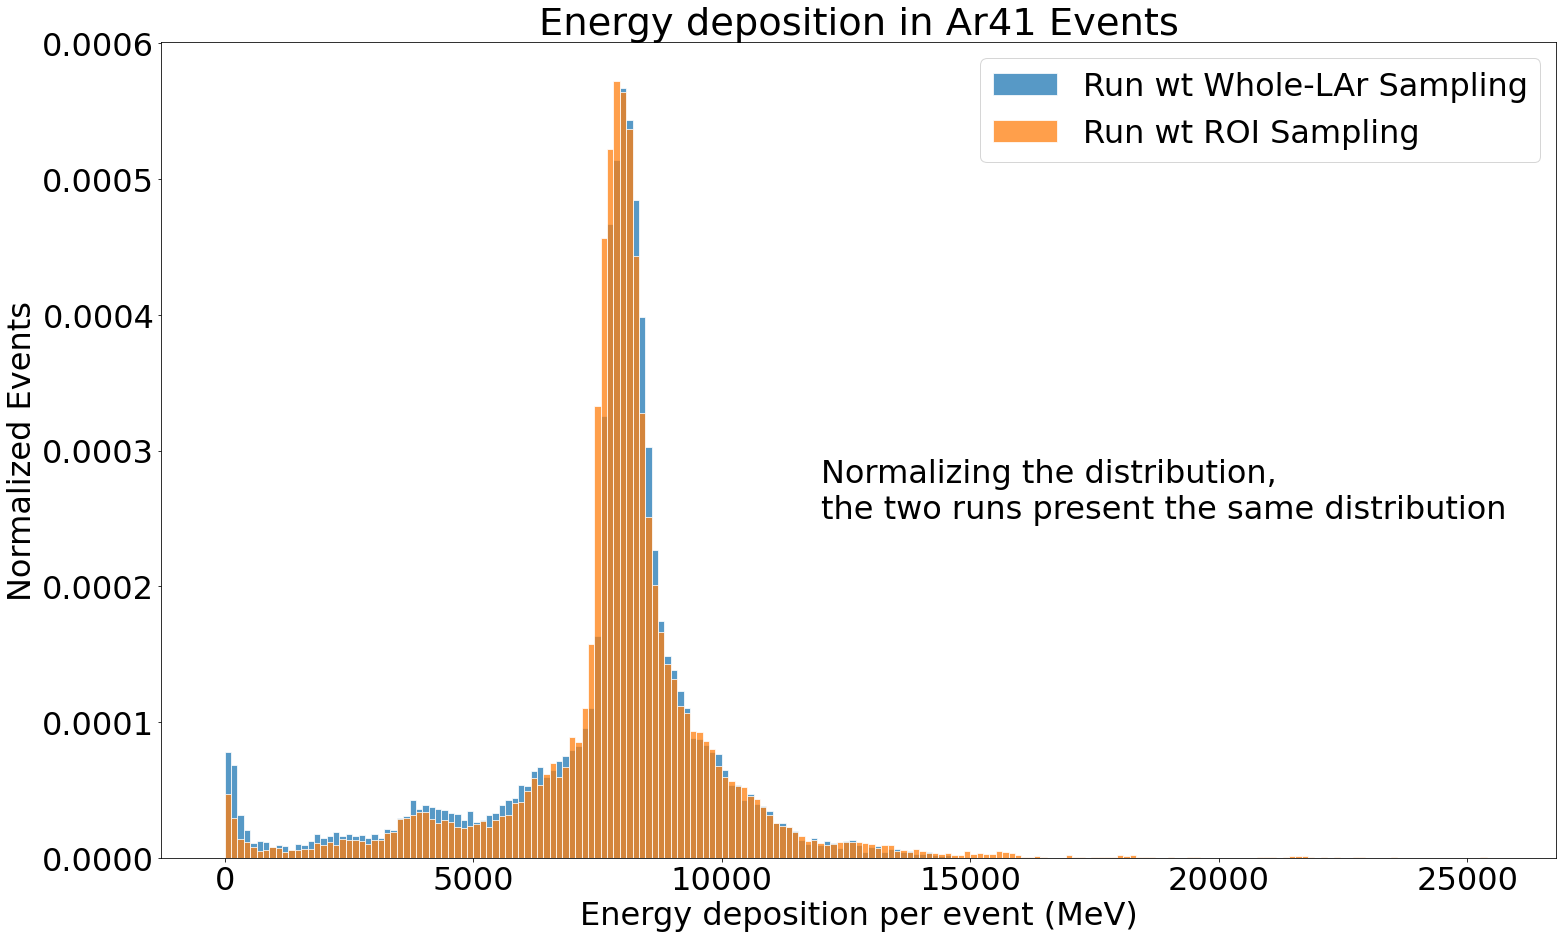

In [5]:
bins = np.linspace(0, edep_gby_event_roivolume.max(), 200)
plt.hist(edep_gby_event_wholevolume, bins=bins, label="Run wt Whole-LAr Sampling", alpha=0.75, density=True, edgecolor='w')
plt.hist(edep_gby_event_roivolume, bins=bins, label="Run wt ROI Sampling", alpha=.75, density=True, edgecolor='w')
plt.xlabel("Energy deposition per event (MeV)")
plt.ylabel("Normalized Events")
plt.title("Energy deposition in Ar41 Events")
plt.text(12000, 0.00025, "Normalizing the distribution,\nthe two runs present the same distribution")
plt.legend()
plt.show()

# Ar41 Production Point

In [6]:
first_ar41_wholevolume = df_wholevolume[df_wholevolume.PID==1000180410].groupby(["eventnumber"]).first().reset_index()
first_ar41_roivolume = df_roivolume[df_roivolume.PID==1000180410].groupby(["eventnumber"]).first().reset_index()

In [7]:
first_ar41_roivolume_3dRadius = (first_ar41_roivolume.x**2 + first_ar41_roivolume.y**2 + first_ar41_roivolume.z**2)**.5
first_ar41_wholevolume_3dRadius = (first_ar41_wholevolume.x**2 + first_ar41_wholevolume.y**2 + first_ar41_wholevolume.z**2)**.5

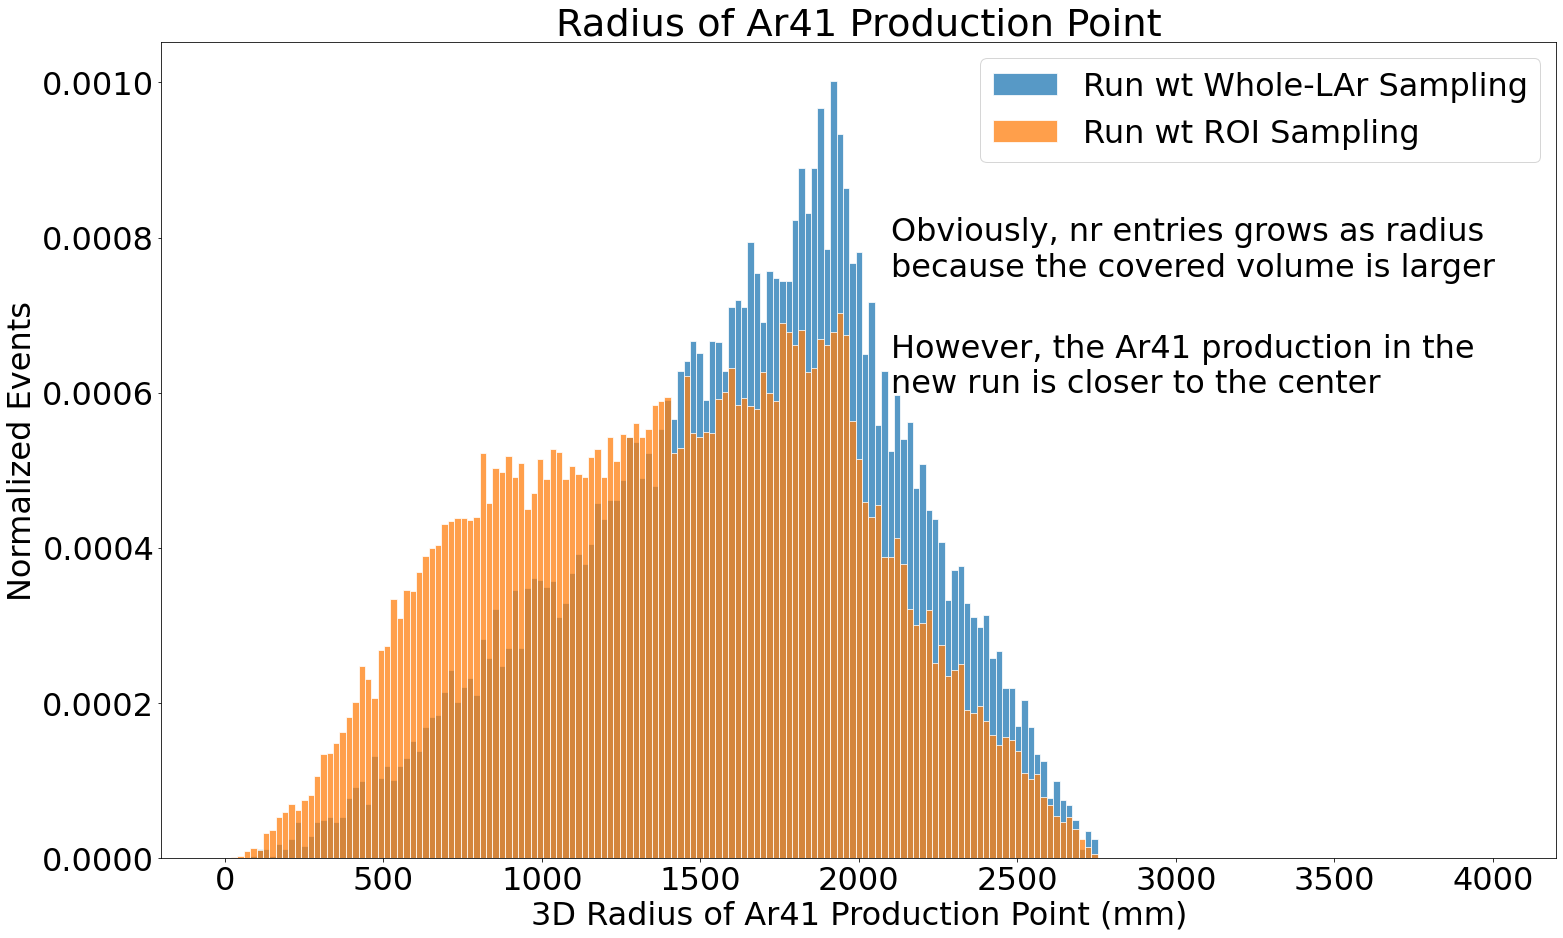

In [8]:
bins = np.linspace(0, 4000, 200)
plt.hist(first_ar41_wholevolume_3dRadius, bins=bins, label="Run wt Whole-LAr Sampling", alpha=0.75, density=True, edgecolor='w')
plt.hist(first_ar41_roivolume_3dRadius, bins=bins, label="Run wt ROI Sampling", alpha=.75, density=True, edgecolor='w')
plt.xlabel("3D Radius of Ar41 Production Point (mm)")
plt.ylabel("Normalized Events")
plt.title("Radius of Ar41 Production Point")
plt.text(2100, 0.00075, "Obviously, nr entries grows as radius\nbecause the covered volume is larger")
plt.text(2100, 0.00060, "However, the Ar41 production in the\nnew run is closer to the center")
plt.legend()
plt.show()

# PE Spectrum

In [9]:
pe_gby_event_wholevolume = df_wholevolume.groupby("eventnumber").pedetected.sum()
pe_gby_event_roivolume = df_roivolume.groupby("eventnumber").pedetected.sum()

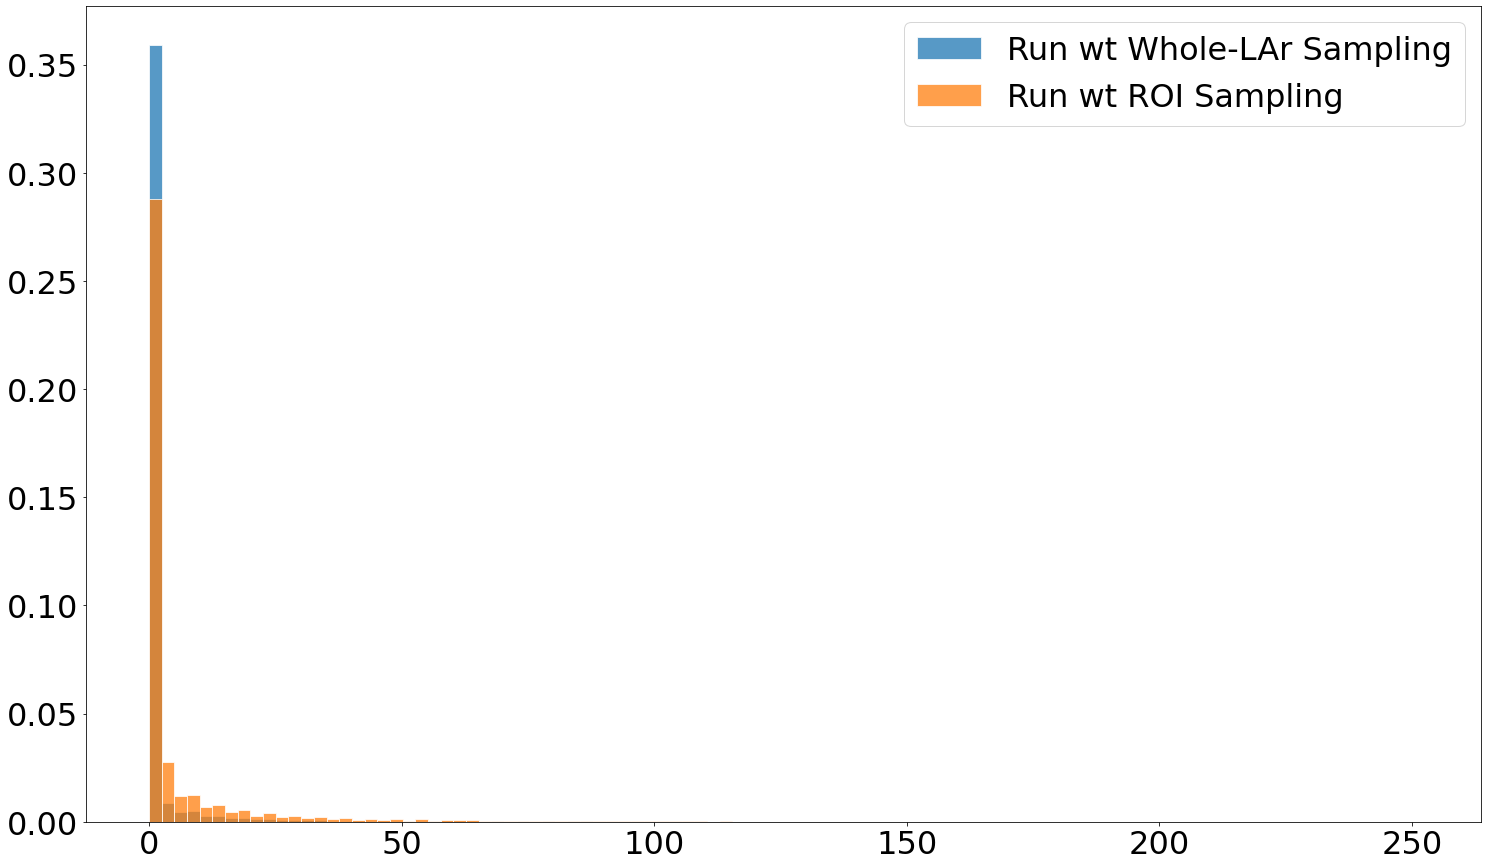

In [10]:
bins = np.linspace(0, pe_gby_event_roivolume.max(), 101)
plt.hist(pe_gby_event_wholevolume, bins=bins, label="Run wt Whole-LAr Sampling", alpha=0.75, density=True, edgecolor='w')
plt.hist(pe_gby_event_roivolume, bins=bins, label="Run wt ROI Sampling", alpha=0.75, density=True, edgecolor='w')
plt.legend()
plt.show()

In [11]:
print("[Info] Sampling in whole LAr Volume: Fraction of undetected Ar41 de-excitations: {:.3f}".format(len(pe_gby_event_wholevolume[pe_gby_event_wholevolume==0])/len(pe_gby_event_wholevolume)))
print("[Info] Sampling in ROI Volume: Fraction of undetected Ar41 de-excitations: {:.3f}".format(len(pe_gby_event_roivolume[pe_gby_event_roivolume==0])/len(pe_gby_event_roivolume)))

[Info] Sampling in whole LAr Volume: Fraction of undetected Ar41 de-excitations: 0.864
[Info] Sampling in ROI Volume: Fraction of undetected Ar41 de-excitations: 0.608


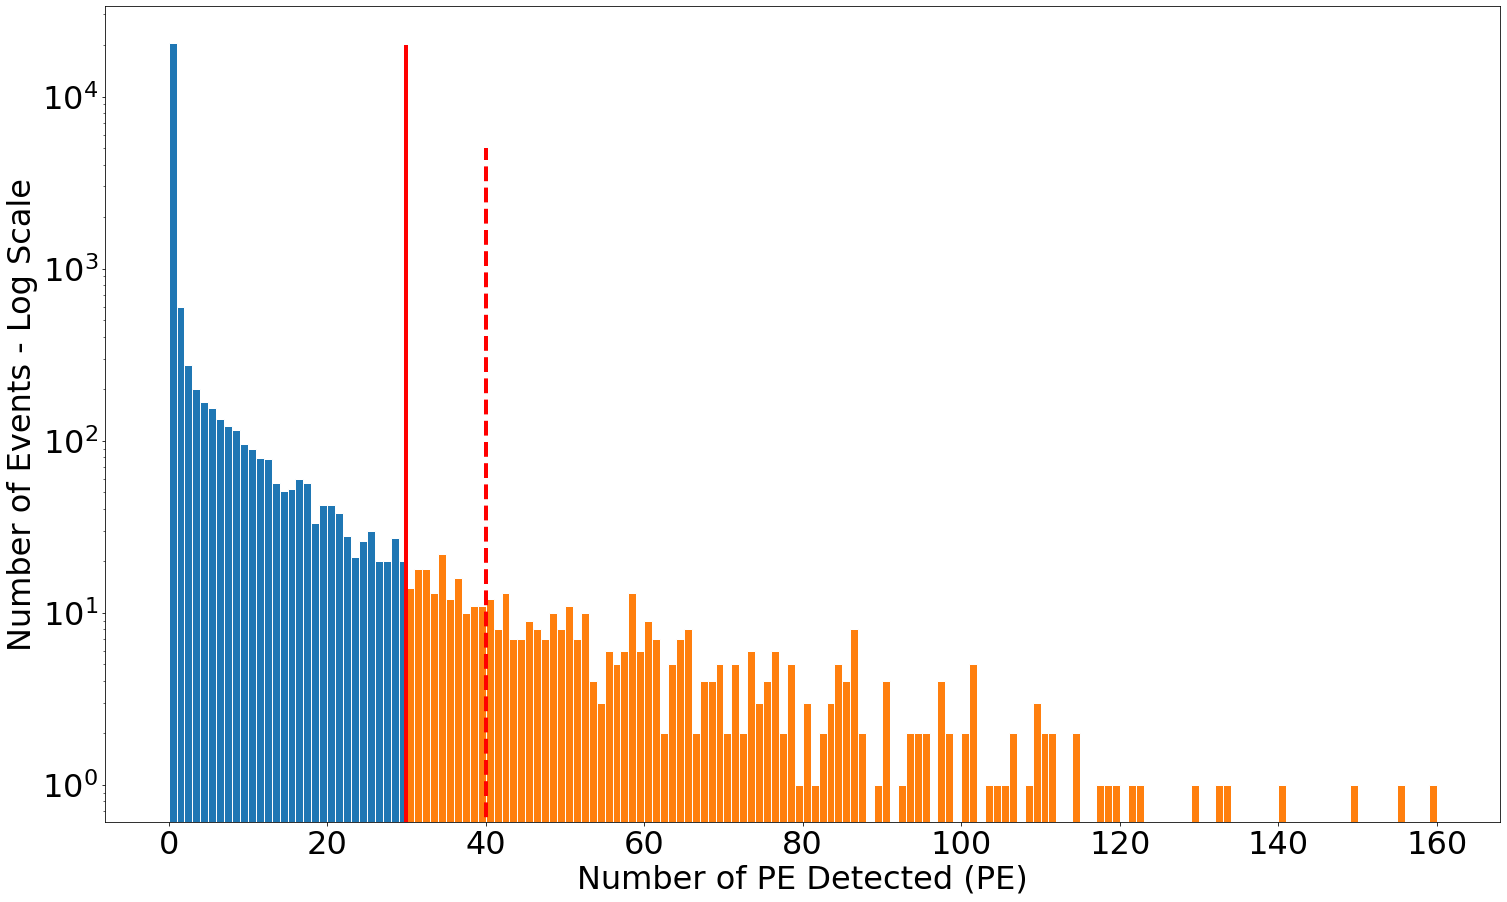

In [33]:
bins = np.linspace(0, pe_gby_event_wholevolume.max(), pe_gby_event_wholevolume.max()+1)
plt.hist(pe_gby_event_wholevolume, bins=bins, alpha=1, density=False, edgecolor='w')
plt.hist(pe_gby_event_wholevolume[pe_gby_event_wholevolume>=30], bins=bins, alpha=1, density=False, edgecolor='w')
plt.vlines(30, 0, 20000, color='r', linewidth=4)
plt.vlines(40, 0, 5000, color='r', linestyles='dashed', linewidth=4)
plt.yscale("log")
plt.xlabel("Number of PE Detected (PE)")
plt.ylabel("Number of Events - Log Scale")
plt.show()

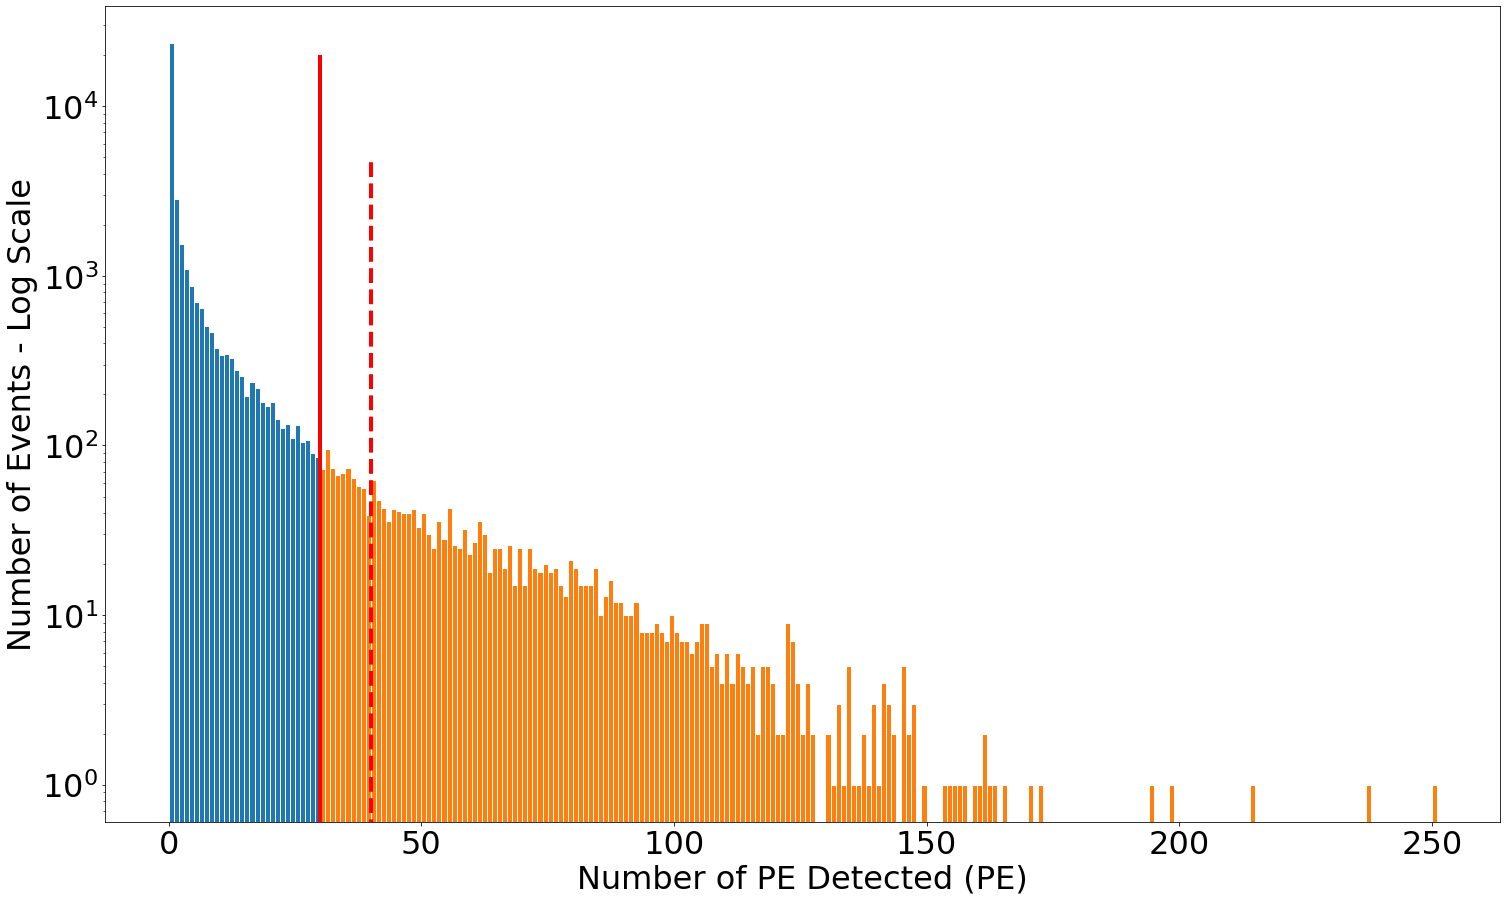

In [45]:
bins = np.linspace(0, pe_gby_event_roivolume.max(), pe_gby_event_roivolume.max()+1)
plt.hist(pe_gby_event_roivolume, bins=bins, alpha=1, density=False, edgecolor='w')
plt.hist(pe_gby_event_roivolume[pe_gby_event_roivolume>=30], bins=bins, alpha=1, density=False, edgecolor='w')
plt.vlines(30, 0, 20000, color='r', linewidth=4)
plt.vlines(40, 0, 5000, color='r', linestyles='dashed', linewidth=4)
plt.yscale("log")
plt.xlabel("Number of PE Detected (PE)")
plt.ylabel("Number of Events - Log Scale")
plt.show()

In [48]:
len(pe_gby_event_roivolume[pe_gby_event_roivolume>30])

2203